In [4]:
from io import StringIO

from SPARQLWrapper import SPARQLWrapper, CSV
import pandas as pd
import matplotlib.pyplot as plt

This notebook shows how to query the dblp SPARQL endpoint via Python.

Make sure that the libraries are installed: `pip install matplotlib pandas sparqlwrapper`

Define SPARQL endpoint:

In [32]:
ENDPOINT = 'https://sparql.dblp.org/sparql'

Function to query a SPARQL endpoint and convert the result to a Pandas `DataFrame` (adapted from https://github.com/lawlesst/sparql-dataframe):

In [12]:
def get_sparql_dataframe(endpoint, query):
    sparql = SPARQLWrapper(endpoint)
    sparql.setQuery(query)
    sparql.setReturnFormat(CSV)
    res = sparql.queryAndConvert()
    csv = StringIO(res.decode('utf-8'))
    return pd.read_csv(csv, sep=',')

Function to query all creator types and their counts:

In [20]:
def get_creator_types() -> pd.DataFrame:
    """
    Get creator types in dblp
    """

    q = """
        PREFIX dblp: <https://dblp.org/rdf/schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        SELECT ?type (COUNT(?type) AS ?count) WHERE {
          ?subject rdf:type dblp:Creator .
          ?subject rdf:type ?type .
          FILTER( ?type != dblp:Creator )
        }
        GROUP BY ?type
        ORDER BY DESC(?count)
        """
    
    df = get_sparql_dataframe(ENDPOINT, q)

    return df

Query SPARQL endpoint:

In [29]:
df = get_creator_types()

In [30]:
df

,type,count
0,https://dblp.org/rdf/schema#Person,3489667
1,https://dblp.org/rdf/schema#AmbiguousCreator,14284
2,https://dblp.org/rdf/schema#Group,351


Plot the results:

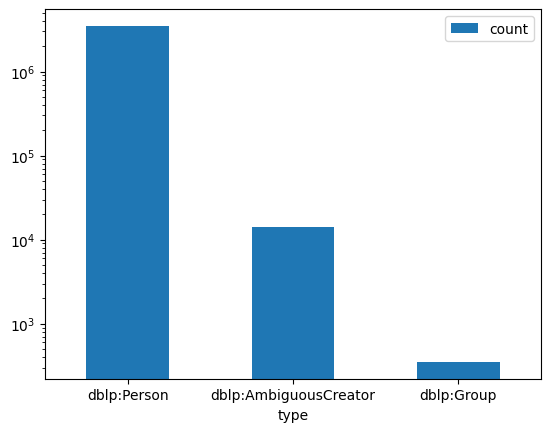

In [31]:
df['type'] = df['type'].str.replace('https://dblp.org/rdf/schema#', 'dblp:')
df.plot.bar(x='type', y='count', logy=True, rot=0)
plt.show()